In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from performance_simulation import *

In [2]:
#General parameters
years = 5
time = 261 * years


#Import parameters
n = int(261 * np.random.uniform(0, 15))
path = "data/MSCI_World.csv"
limit = slice(n, time+n)


#Trade parameters
trades = 10 * years
max_trades = 20 * years
hold_time = 30
time_after_reversel = 0
smooth_period = 20

trade_coast = 1
spread = 0.002
tax_rate = 0.25
tax_allowance = 1000

initial_capital = 5000
saving_plan = 500
saving_plan_time = 22


chim =  ChartImport(  initial_capital=initial_capital, saving_plan=saving_plan, saving_plan_time=saving_plan_time, time=time, 
                      trades=trades, max_trades=max_trades, hold_time=hold_time, time_after_reversel=time_after_reversel, smooth_period=smooth_period, trade_coast=trade_coast, spread=spread, tax_rate=tax_rate, tax_allowance=tax_allowance
                      )

performance, dates = chim.load_data(path=path, limit=limit)

buy_and_hold_performance = chim.buy_and_hold(set='data')[0]
random_swing_performance_analyse = chim.random_swing_trade_ana(set='data')[0]
swing_performance_analyse = chim.swing_trade_ana(set='data')[0]


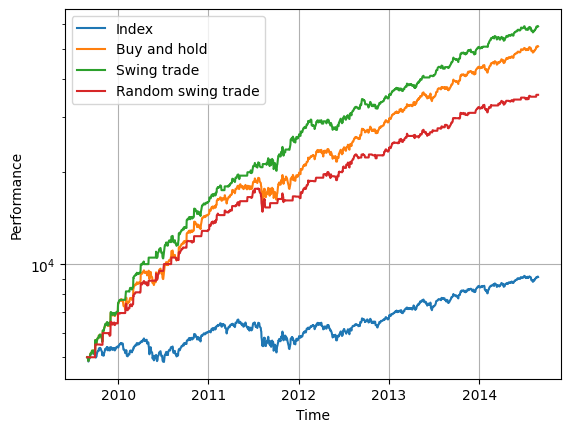

Initial capital:  5000
Total money invested:  34659

Index performance:
    Absolute: 9105.18, Relative: 1.82
    Yearly performance: 1.13

Buy and hold return:
    Absolute: 50919.38, Relative: 1.47
    Yearly performance: 1.08, Internal rate of return: 1.14
    Taxes: 0, Transaction cost: 128.88

Swing trade return:
    Absolute: 59121.13, Relative: 1.71
    Yearly performance: 1.11, Internal rate of return: 1.19
    Taxes: 7755.95, Transaction cost: 1468.92

Random swing trade return:
    Absolute: 35473.61, Relative: 1.02
    Yearly performance: 1.0, Internal rate of return: 1.01
    Taxes: 1835.49, Transaction cost: 2077.76



In [7]:
plt.plot(dates, performance, label="Index")
plt.plot(dates, buy_and_hold_performance, label="Buy and hold")
plt.plot(dates, swing_performance_analyse, label="Swing trade")
plt.plot(dates, random_swing_performance_analyse, label="Random swing trade")
#plt.axhline(1, color="black", linestyle="--")   

plt.xlabel("Time")
plt.ylabel("Performance")

plt.grid()
plt.legend()

plt.yscale("log")

plt.show()

#chim.print_parameters()
chim.print_results()
#chim.plot_performance()

In [4]:
mc = MonteCarloSimulation(chartimp=chim, parallel=True)
_ = mc.mc_import_chart(n=2500, stepsize=2, path=path, limit=limit)

# mc.hist_performance(limits=None, bins=30)

100%|██████████| 2500/2500 [01:08<00:00, 36.64it/s]


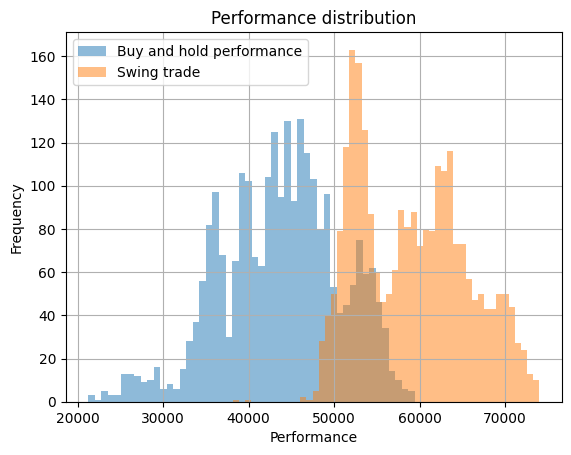

Initial capital:  5000
Total money invested:  34659

Index performance:
  Overall return: 7290.916 +/- 1986.743 (Median: 7227.992)
  Yearly performance: 1.072 +/- 0.059 (Median: 1.076)

Buy and hold return:
  Overall return: 43754.13 +/- 6956.248 (Median: 44189.533)
  Yearly performance: 1.045 +/- 0.035 (Median: 1.05)
  Internal rate of return: 1.08 +/- 0.06 (Median: 1.088)
  Taxes: 0.0 +/- 0.0 (Median: 0.0)
  Transaction cost: 128.88 +/- 0.0 (Median: 128.88)

Swing trade return:
  Overall return: 59121.351 +/- 6441.556 (Median: 58998.63)
  Yearly performance: 1.112 +/- 0.024 (Median: 1.112)
  Internal rate of return: 1.191 +/- 0.04 (Median: 1.192)
  Taxes: 7224.603 +/- 2134.608 (Median: 7042.025)
  Transaction cost: 1329.754 +/- 130.568 (Median: 1314.854)

Random swing trade return:
  Overall return: 34153.913 +/- 4192.205 (Median: 34372.591)
  Yearly performance: 0.996 +/- 0.025 (Median: 0.998)
  Internal rate of return: 0.994 +/- 0.045 (Median: 0.999)
  Taxes: 1956.852 +/- 842.78 (M

In [5]:
bins=50
limits=None

#plt.hist(mc.index_performance, bins=bins, range=limits, alpha=0.5, label="Index Performance")
plt.hist(mc.buy_and_hold_profit, bins=bins, range=limits, alpha=0.5, label="Buy and hold performance")
plt.hist(mc.swing_profit, bins=bins, range=limits, alpha=0.5, label="Swing trade")
#plt.hist(mc.random_swing_profit, bins=bins, range=limits, alpha=0.5, label="Random swing trade")

plt.xlabel("Performance")
plt.ylabel("Frequency")
plt.title("Performance distribution")

plt.grid()
plt.legend()
plt.show()

mc.print_results(accuracy=3)

In [6]:
mc.chartsim